<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [ ]:
#installing selenium package
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [82.3 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:13 http://archive.ubuntu.com/ubun

In [ ]:
from selenium import webdriver #importing selenium package
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome('chromedriver',options=options)
link = 'https://www.imdb.com/title/tt7286456/reviews?ref_=tt_urv'
title_array = []
review_array = []
driver.get(link)
for num in range(4):
  driver.find_element_by_class_name("ipl-load-more__button").click()
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
  listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
for ele, sub_ele in zip(listOfTitle, listOfReviews):
      title_array.append((ele.text).replace('\n',''))
      review_array.append(sub_ele.text)
df = pd.DataFrame(list(zip(title_array, review_array)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  if sys.path[0] == '':


Length of data frame is 125


,Title,Review
0,Outstanding movie with a haunting performance ...,"Every once in a while a movie comes, that trul..."
1,Only certain people can relate,This is a movie that only those who have felt ...
2,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o..."
3,MASTERPIECE 😍,Joaquin Phoenix gives a tour de force performa...
4,The Hype is real,Most of the time movies are anticipated like t...
...,...,...
120,"Good, if derivative",
121,Arthur Fleck: a case study of a young person's...,This film surpassed all other films in portray...
122,A gorgeously crafted baroque film with a sheer...,A confused representation of insanity from a p...
123,10 as a Masterpiece of a Stand-Alone Film. 5 f...,While we were at one of the only pre-screening...


In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [ ]:
df['Lower Case'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
import re
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from textblob import TextBlob
df['Spelling Correction'] = df['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
import nltk
nltk.download('punkt')
df['Tokenization'] = df['Spelling Correction'].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['After Stemming'] = df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

In [ ]:
from textblob import Word
import nltk
nltk.download('wordnet')

df['After Lemmatization'] = df['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.to_csv('/content/sample_data/reviwes.csv',index=False)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in df['After Lemmatization']:
  words_sentence.append(word_tokenize(sentence))
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))

In [ ]:
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('everi', 'movi', 'come'): 1,
          ('movi', 'come', 'truli'): 1,
          ('come', 'truli', 'make'): 1,
          ('truli', 'make', 'impact'): 1,
          ('make', 'impact', 'joaquin'): 1,
          ('impact', 'joaquin', 'perform'): 1,
          ('joaquin', 'perform', 'scenographi'): 1,
          ('perform', 'scenographi', 'brillianc'): 1,
          ('scenographi', 'brillianc', 'grotesqu'): 1,
          ('brillianc', 'grotesqu', 'hunt'): 1,
          ('grotesqu', 'hunt', 'cring'): 1,
          ('hunt', 'cring', 'hard'): 1,
          ('cring', 'hard', 'watch'): 1,
          ('hard', 'watch', 'time'): 1,
          ('watch', 'time', 'mesmer'): 1,
          ('time', 'mesmer', 'wont'): 1,
          ('mesmer', 'wont', 'blink'): 1,
          ('wont', 'blink', 'eye'): 1,
          ('blink', 'eye', 'watch'): 1,
          ('eye', 'watch', 'tragic'): 1,
          ('watch', 'tragic', 'serious'): 1,
          ('tragic', 'serious', 'funni'): 1,
          ('serious', 'funni', 'moment

In [ ]:
from collections import Counter
bi_grams = nltk.bigrams(iterations)
frequency_dist = nltk.FreqDist(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
  print( str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))

Streaming output truncated to the last 5000 lines.
('refer', 'drop'):0.2
('drop', 'cring'):0.3333333333333333
('cring', 'littl'):0.2
('littl', 'edg'):0.1
('edg', 'moment'):0.16666666666666666
('moment', 'like'):0.09090909090909091
('like', 'dont'):0.017241379310344827
('dont', 'smile'):0.03125
('smile', 'sign'):0.5
('sign', 'scene'):0.3333333333333333
('scene', 'seem'):0.043478260869565216
('seem', 'design'):0.06666666666666667
('design', 'sole'):0.3333333333333333
('sole', 'someth'):1.0
('someth', 'hot'):0.0625
('hot', 'topic'):1.0
('topic', 'print'):0.5
('print', 'new'):1.0
('new', 'shirt'):0.08333333333333333
('shirt', 'everi'):1.0
('singl', 'plot'):0.25
('plot', 'twist'):0.13043478260869565
('twist', 'telegraph'):0.1
('telegraph', 'far'):1.0
('far', 'advanc'):0.06666666666666667
('advanc', 'lot'):1.0
('lot', 'u'):0.09090909090909091
('u', 'seen'):0.06666666666666667
('seen', 'exact'):0.041666666666666664
('exact', 'twist'):1.0
('twist', 'mani'):0.1
('mani', 'time'):0.11764705882352

In [ ]:
whole_dataset = ''
index = []
i = 1
for line in df['After Lemmatization']:
  whole_dataset = whole_dataset + line
  value = 'Review-' + str(i)
  index.append(value)
  i += 1

In [ ]:
import nltk
nltk.download('brown')
from textblob import TextBlob
noun_phrases = []
frequency = []
for line in df['After Lemmatization']:
  blob = TextBlob(line)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for word in noun_phrases:
  noun_phrases_freq = []
  for line in df['After Lemmatization']:
    noun_phrases_freq.append(line.count(word) / whole_dataset.count(word))
  frequency.append(noun_phrases_freq)
noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = index
noun_phrases_df  

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


,everi movi,impact joaquin,scenographi brillianc grotesqu hunt,time mesmer wont blink eye,serious funni moment emot rollercoast sometim multipl emot,typic actionriddl,superhero movi,proper psycholog thrillerdrama singl,alon isol truli relat,sorri charact lot peopl,...,masterpiec convinc,old mother,genesi joke,neg press movi,mental health issu,movi sympath arthur foot joke,certain point surpris,small amount violenc depict press putdown,social commentari movi,mon alway
Review-1,1.0,1.0,1.0,1.0,1.0,1.0,0.25,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-5,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review-121,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-122,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-123,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-124,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here
# Write your code here
import math
def tf_idf_value(sentence,word):
  size = len(sentence.split(" "))
  tf_value = sentence.count(word)/size
  idf_value = 0
  if(tf_value!=0):
    idf_value = math.log(size)/sentence.count(word)
  else:
    return 0;
  return tf_value*idf_value

sentences = df["Spelling Correction"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list,columns=["token"])
count = 0
for i in sentences:
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
  count+=1

tf_idf






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


,token,0,1,2,3,4,5,6,7,8,...,115,116,117,118,119,120,121,122,123,124
0,,0.081918,0.093937,0.055855,0.08065,0.083231,0.058163,0.110774,0.035297,0.070931,...,0.047936,0.020007,0.0,0.0,0.298627,0.0,0.088992,0.027041,0.070008,0.072861
1,replaces,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,viewer,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,contrived,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,subways,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,restaurant,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2334,colorshues,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2335,bridges,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2336,thing,0.000000,0.000000,0.055855,0.00000,0.000000,0.058163,0.000000,0.000000,0.000000,...,0.000000,0.020007,0.0,0.0,0.000000,0.0,0.000000,0.027041,0.000000,0.000000


In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
query_sentence = 'Shang-Chi and the Legend of the Ten Rings is an Action - Fantasy movie in which we watch a new era of Marvel Studios rise with Shang-Chi,the master of Kung Fu. He has to face his past involving him with the Ten Rings organization and crate his future accordingly.Finally, I have to say that "Shang-Chi and the Legend of the Ten Rings" is an amazing movie and I strongly recommend everyone to watch it, especially the fans of Marvel.'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english') 
X_set = {w for w in X_list if not w in sw}

In [ ]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector: 
      if w in X_set: l1.append(1)
      else: l1.append(0) 
      if w in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvector, l1, l2

In [ ]:
def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5) 
  return cosine

In [ ]:
similarity_list = []
for sentence in df['Spelling Correction']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['Review'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,"Every once in a while a movie comes, that trul...",0.048479
1,This is a movie that only those who have felt ...,0.057236
2,"Truly a masterpiece, The Best Hollywood film o...",0.0
3,Joaquin Phoenix gives a tour de force performa...,0.025367
4,Most of the time movies are anticipated like t...,0.05135
...,...,...
120,,None
121,This film surpassed all other films in portray...,0.0274
122,A confused representation of insanity from a p...,0.02641
123,While we were at one of the only pre-screening...,0.044744


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [7]:
# Write your code here
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium








Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu 

In [8]:
from selenium import webdriver #importing selenium package
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [9]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome('chromedriver',options=options)
link = 'https://www.imdb.com/title/tt7286456/reviews?ref_=tt_urv'
title_array = []
review_array = []
driver.get(link)
for num in range(4):
  driver.find_element_by_class_name("ipl-load-more__button").click()
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
  listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
for ele, sub_ele in zip(listOfTitle, listOfReviews):
      title_array.append((ele.text).replace('\n',''))
      review_array.append(sub_ele.text)
df = pd.DataFrame(list(zip(title_array, review_array)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  if sys.path[0] == '':


Length of data frame is 125


,Title,Review
0,Outstanding movie with a haunting performance ...,"Every once in a while a movie comes, that trul..."
1,Only certain people can relate,This is a movie that only those who have felt ...
2,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o..."
3,MASTERPIECE 😍,Joaquin Phoenix gives a tour de force performa...
4,The Hype is real,Most of the time movies are anticipated like t...
...,...,...
120,Best film in the 21st century,
121,a mirror,"In many aspects, it is a mirror. For society, ..."
122,Amazing movie,Best acting and story. This is an Oscar winnin...
123,Arthur Fleck: a case study of a young person's...,This film surpassed all other films in portray...


In [17]:
list2 = []
for i in df.index:
    y = str(df["Review"][i]).split()
    list2.append(y)

In [18]:
model2 = Word2Vec(list2, size = 300)
print(model2)

Word2Vec(vocab=395, size=300, alpha=0.025)


In [19]:
words2 = list(model2.wv.vocab)

In [20]:
words2

['in',
 'a',
 'while',
 'movie',
 'that',
 'truly',
 'makes',
 'an',
 "Joaquin's",
 'performance',
 'and',
 'all',
 "it's",
 'to',
 'watch',
 'at',
 'but',
 'so',
 'you',
 'watching',
 'it.',
 'with',
 '-',
 'multiple',
 'emotions',
 'the',
 'same',
 'time.',
 'this',
 'is',
 'far',
 'from',
 'proper',
 'psychological',
 'best',
 'character',
 'I',
 'have',
 'ever',
 'This',
 'only',
 'those',
 'who',
 'felt',
 'can',
 'You',
 'understand',
 'feel',
 'for',
 'character.',
 'A',
 'lot',
 'of',
 'people',
 'will',
 'see',
 'think',
 'it',
 'But',
 'should',
 'each',
 'every',
 'one',
 'us',
 'become',
 'better',
 'everyone',
 'make',
 'other',
 'like',
 'they',
 'instead',
 'making',
 'them',
 'The',
 'Best',
 'Hollywood',
 'film',
 'films',
 'And',
 'comic',
 'book',
 'real',
 'are',
 'find',
 "It's",
 'about',
 'society',
 'people,',
 'do',
 'something',
 'way',
 'shows',
 'class',
 'how',
 'around',
 'not',
 "that's",
 'what',
 'There',
 'could',
 'be',
 'our',
 'much',
 'than',
 'up'

In [23]:
# fit a 2d PCA model to the vectors
from sklearn.decomposition import PCA

X = model2[model2.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


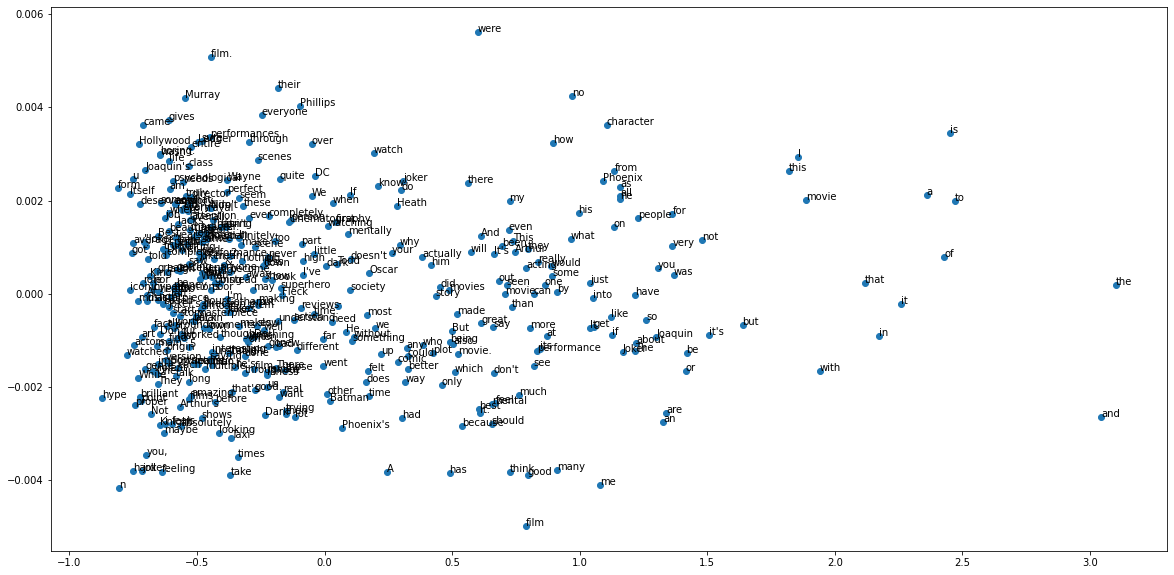

In [24]:
# create a scatter plot of the projection
import matplotlib.pyplot as plt
plt.figure (figsize = (20,10))
plt.scatter(result[:, 0], result[:, 1])
words = list(model2.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: https://github.com/nivemula/Nithin_INFO5731_Spring2022/blob/main/sentimentalAnalysis.csv



